# Predicting the sale price of bulldozers using Machine Learning (Time series data)

### 1. Problem Defination
> How well can we predict the future sale price of a bull dozer, given its characterstics and previous examples of how much similar bull dozers hv been sold for?

### 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition
https://www.kaggle.com/c/bluebook-for-bulldozers/overview

### 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Note: The goal of this project is to build a machine learning model which minimises RMSLE.

### 4. Features

https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

### 5. Prediction
Format as specified in Kaggle
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

## 1. Data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# importing training and validation sets
df=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)


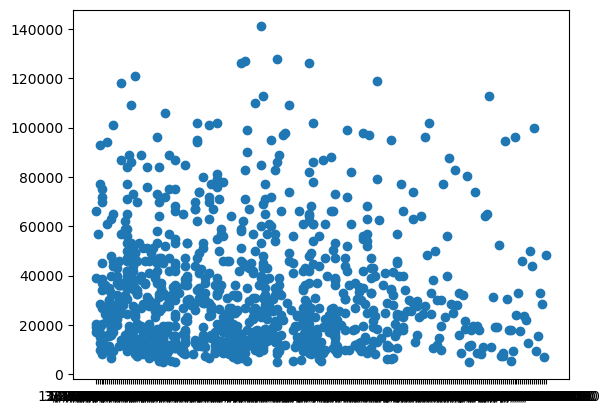

In [21]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

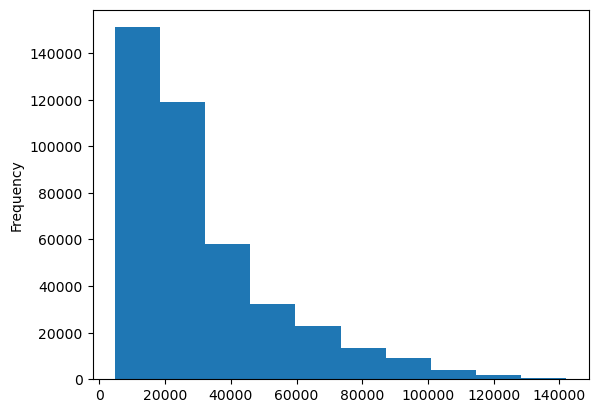

In [22]:
df["SalePrice"].plot.hist()

In [23]:
df["saledate"][:1000] # see dtype object

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

### Parsing dates

When we work with time series data, we want to enrich the time and date component as much as possible.
We can do that by telling pandas of our columns has dates in it `parse_dates` parameter

In [5]:
# importing df again
df=pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
               low_memory=False,
               parse_dates=["saledate"])
df.saledate[:1000]  
# dtype is date not object anymore

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

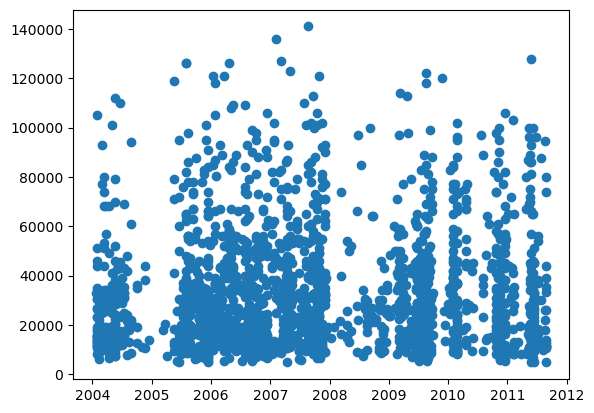

In [25]:
# see the x row now
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:2000],df["SalePrice"][:2000])

In [26]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [6]:
# sort DataFrame in date order
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original Dataframe

In [7]:
# Make a copy
df_tmp=df.copy()

## 2. Feature Engineering

### Add datetime parameter for `saledate` column

In [8]:
df_tmp["saleYear"]=df_tmp["saledate"].dt.year
df_tmp["saleMonth"]=df_tmp["saledate"].dt.month
df_tmp["saleDay"]=df_tmp["saledate"].dt.day
df_tmp["saleDayOfWeek"]=df_tmp["saledate"].dt.dayofweek
df_tmp["saleDayOfYear"]=df_tmp["saledate"].dt.dayofyear

In [31]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [9]:
# Now we hv enriched our dataframe with data time features, we can  remove saledate column
df_tmp.drop("saledate",axis=1,inplace=True)

In [33]:
# check values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 3. Handling String  (converting into categories)

In [54]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [10]:
# Find columns which contain strings

# can treat pd columns as dict

for label,content in df_tmp.items(): # label is column name, content are the item within it
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [11]:
for label,content in df_tmp.items(): # label is column name, content are the item within it
    if pd.api.types.is_object_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()


In [12]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [13]:
# mark the use of categories ( name converted into numbers based on categories)

df_tmp["state"].cat.codes # category codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Saved preprocessed data

In [59]:
df_tmp.to_csv("bluebook-for-bulldozers/train_tmp.csv",
               index=False)

In [295]:
# Import preprocessed data
df_tmp = pd.read_csv("bluebook-for-bulldozers/train_tmp.csv",
                     low_memory=False)

## 4. Handling Missing Values

#### Numeric data


In [14]:
for label,content in df_tmp.items(): # label is column name, content are the item within it
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            


auctioneerID
MachineHoursCurrentMeter


In [15]:
for label,content in df_tmp.items(): # label is column name, content are the item within it
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            # add a binary column which tells us if data was missing
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            
            # filling the values
            df_tmp[label]=content.fillna(content.median())
            
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [16]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
else:
    print("U filled everey numeric column!!")

U filled everey numeric column!!


#### Categorical values


In [17]:
for label,content in df_tmp.items(): # label is column name, content are the item within it
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [18]:
# Turn categorical variables into numbers and fill missing
for label,content in df_tmp.items(): # label is column name, content are the item within it
    if not pd.api.types.is_numeric_dtype(content):
        # add binary column to indicate whether sample has missing values
        df_tmp[label+"_is missing"]=pd.isnull(content)
            
        # turn catgories into numbers and add +1
        df_tmp[label]=pd.Categorical(content).codes+1

In [19]:
df_tmp.isna().sum()[:54]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


## 3. Modelling

Some model driven EDA

In [21]:
%%time

model=RandomForestRegressor(n_jobs=-1,random_state=42)  # like np.random.seed(42)

x=df_tmp.drop("SalePrice",axis=1)
y=df_tmp["SalePrice"]
model.fit(x,y)

CPU times: total: 45min 58s
Wall time: 6min 17s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [22]:
model.score(x,y)

0.9875468079970562

### Saving preprocessed data

In [23]:
df_tmp.to_csv("bluebook-for-bulldozers/train_temp.csv",
               index=False)

### Importing preprocessed data

In [3]:
# Import preprocessed data
df_temp_processed = pd.read_csv("bluebook-for-bulldozers/train_temp.csv",
                     low_memory=False)

### 3.1 Splitting datasets into training and validation splits

In [4]:
df_val=df_temp_processed[df_temp_processed["saleYear"]==2012]
df_train=df_temp_processed[df_temp_processed["saleYear"]!=2012]

len(df_val),len(df_train)

(11573, 401125)

In [5]:
# splitting data in x,y

x_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
x_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val["SalePrice"]

x_train.shape,x_valid.shape,y_train.shape,y_valid.shape

((401125, 102), (11573, 102), (401125,), (11573,))

## 4. Evaluation

In [6]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))


# Various other evaluation metrics
def show_scores(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_valid)
    scores={
        "Training MAE":mean_absolute_error(y_train,train_preds),
        "Valid MAE":mean_absolute_error(y_valid,val_preds),
        "Training RMSLE": rmsle(y_train,train_preds),
        "Valid RMSLE": rmsle(y_valid,val_preds),
        "Training R^2": r2_score(y_train,train_preds),
        "Valid R^2": r2_score(y_valid,val_preds),
    }
    return scores


## 5. Testing our model on a subset (to tune the hyperparameters)

In [36]:
# Change max_samples value
model= RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000) 
# instead of 400k samples it fits 10k samples

In [ ]:
# n_estimators =100 so before it had to go 401125*100 times..
# now it has to go only 10000*100 times

In [38]:
%%time
model.fit(x_train,y_train)

CPU times: total: 1min 15s
Wall time: 10.8 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [39]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### RandomizedSearchCV

In [50]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# grid
rf_grid={"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","log2"],
         "max_samples":[10000]}

# instantiate RandomizedSearchCV

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                  random_state=42),
                            param_distributions=rf_grid,
                            n_iter=4,
                            cv=5,
                            verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: total: 32.2 s
Wall time: 1min 3s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=4,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [51]:
# best model hyperparmeters
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 18,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 10}

In [52]:
show_scores(rs_model)

{'Training MAE': 9008.040439304506,
 'Valid MAE': 10411.052734568768,
 'Training RMSLE': 0.3953035013883446,
 'Valid RMSLE': 0.4151302459330933,
 'Training R^2': 0.6787685850217635,
 'Valid R^2': 0.687125848256127}

### Train a model with best hyperparameters

Note: These were found after 100 iterations of `RandomizedSearchCV` (by Daniel)

In [7]:
%%time
# most ideal hyperparameters
ideal_model=RandomForestRegressor(n_estimators=40,
                                  min_samples_leaf=1,
                                  min_samples_split=14,
                                  max_features=0.5,
                                  n_jobs=-1,
                                  max_samples=None, # All data to be fitted
                                  random_state=42) 

# Fit
ideal_model.fit(x_train,y_train)

# less time taken as n_estimators=100

CPU times: total: 4min 38s
Wall time: 42.8 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [8]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

## 5. Preprocessing out test dataset

In [125]:
df_test=pd.read_csv("bluebook-for-bulldozers/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])


In [126]:
df_test.auctioneerID.isna().sum()

0

In [127]:
# creating function to treat string values and fill the missing state

def preprocess_data(df):
    
    
    # adding columns
    df["saleYear"]=df["saledate"].dt.year
    df["saleMonth"]=df["saledate"].dt.month
    df["saleDay"]=df["saledate"].dt.day
    df["saleDayOfWeek"]=df["saledate"].dt.dayofweek
    df["saleDayOfYear"]=df["saledate"].dt.dayofyear
    
    # Now we hv enriched our dataframe with data time features, we can  remove saledate column
    df.drop("saledate",axis=1,inplace=True)
        
    # changing object type to category type
    for label,content in df.items(): 
        if pd.api.types.is_object_dtype(content):
            df[label]=content.astype("category").cat.as_ordered()

    # handling missing numeric values
    for label,content in df.items(): # label is column name, content are the item within it
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():

                # add a binary column which tells us if data was missing
                df[label+"_is_missing"]=pd.isnull(content)

                # filling the values
                df[label]=content.fillna(content.median())
            
            # MARK THIS IS DONE AS IN TEST SET AUCTIONEERID COLUMN WAS NOT EMPTY.. 
            # SO WE HAVE TO CREATE THE COLUMN MANUALLY
            df["auctioneerID_is_missing"]=pd.isnull(content)

    
    # Turn categorical variables into numbers and fill missing
    for label,content in df.items(): # label is column name, content are the item within it
        if not pd.api.types.is_numeric_dtype(content):
            # add binary column to indicate whether sample has missing values
            df[label+"_is missing"]=pd.isnull(content)

            # turn catgories into numbers and add +1
            df[label]=pd.Categorical(content).codes+1    
    
    return df

preprocess_data(df_test)



,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is missing,Stick_Length_is missing,Thumb_is missing,Pattern_Changer_is missing,Grouser_Type_is missing,Backhoe_Mounting_is missing,Blade_Type_is missing,Travel_Controls_is missing,Differential_Type_is missing,Steering_Controls_is missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [128]:
# We can find how the columns dffer by 
set(x_train.columns)-set(df_test.columns) 

# now empty as we filled the values of auctioneerID_is_missing manually

set()

In [129]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is missing     0
Blade_Type_is missing           0
Travel_Controls_is missing      0
Differential_Type_is missing    0
Steering_Controls_is missing    0
Length: 102, dtype: int64

In [130]:
# Make prediction
test_preds=ideal_model.predict(df_test)
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

### Prediction format as asked in kaggle

https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [131]:
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalePrice"]=test_preds

df_preds

,SalesID,SalePrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [132]:
# Export prediction data
df_preds.to_csv("final_prediction.csv",index=False)

## 6. Feature Importance

In [140]:
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [138]:
def plot_features(columns,importances,n=20):
    dataf=pd.DataFrame({"features":columns,
                     "feature_importances":importances}).sort_values("feature_importances",ascending=False).reset_index(drop=True)
        
    # plot dataframe
    fig,ax=plt.subplots()
    ax.barh(dataf["features"][:n],dataf["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")

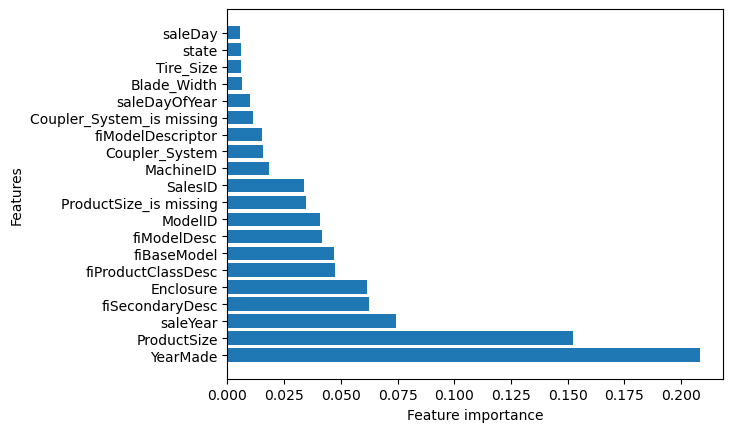

In [139]:
plot_features(x_train.columns,ideal_model.feature_importances_)

In [9]:
## saving the model
from joblib import dump,load

# save model to file
dump(ideal_model,filename="final_model.joblib")

['final_model.joblib']

In [10]:
## loading model
loaded_job_model=load(filename="final_model.joblib")
show_scores(loaded_job_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450093}